# Selected exercises from chapter 1: The learning problem

The following notebook presents solutions to problems 1.2, 1.3, 1.10, 1.11 and 1.12

In [75]:
using Distributions
using Plots

# Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1, 000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_1$ is the first coin flipped; $C_{rand}$ is a coin you choose at random; $C_{min}$ is the
coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1$ , $V_{rand}$ and $V_{min}$ be the fraction of heads you obtain for the respective three coins.

- (a) What is μ for the three coins selected?
    
- (b) Repeat this entire experiment a large n umber of times (e.g. , 100, 000 runs of the entire experiment) to get several instances of v1 , Vrand and Vmin a nd plot the histograms of the distributions of v1 , Vrand a nd Vmin. Notice that which coins end up being Crand and Cmin may differ from one run to another.

In [ ]:
# Simulation of *times* flip(s) for 1000 independent fair coins

coins = []
for i in 1:1000
    coin = Bernoulli(0.5)
    push!(coins, coin)
end

function flipCoin(c,times)
    f = rand(c,times)
    return f
end

function simulate(times)
    results = []
    for coin in coins
        push!(results, flipCoin(coin,times))
    end
    return results
end

In [216]:
function fractionTails(result)
    return count(i->(i==1), result)/size(result)[1]
end

function statsSim(sim)
    
    # Get c_min (coin with the minumum frecuency of heads)
    frec_heads = []
    for result in sim
        push!(frec_heads, count(i->(i==1), result))
    end
    m = minimum(frec_heads)
    
    index = findfirst(isequal(m),frec_heads)
    p = rand(1:1000)
    
    # Selection of tree coins
    c_1 = sim[1]
    c_rand = sim[p]
    c_min = sim[index]

    # Fraction of tails
    v_1 = fractionTails(c_1)
    v_rand = fractionTails(c_rand)
    v_min = fractionTails(c_min)
    
    return v_1, v_rand, v_min
end

statsSim (generic function with 1 method)

In [217]:
# 100.000 runs of the simulation to get samples of  v_1, v_rand and v_min
V1 = []
VR = []
VM = []
for i in 1:100000
    s = simulate(10)
    v_1,v_rand,v_min = statsSim(s)
    push!(V1,v_1)
    push!(VR, v_rand)
    push!(VM, v_min)
end

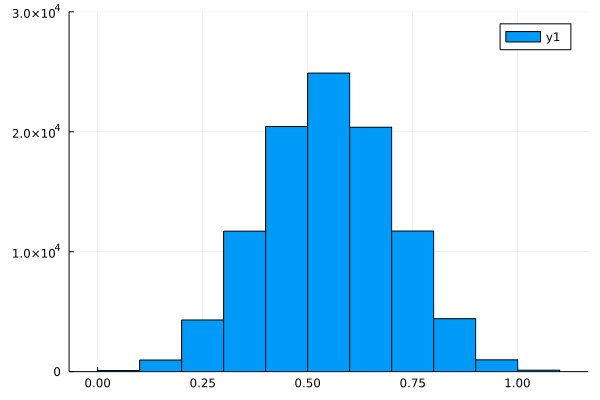

In [218]:
histogram(V1, bins=10, ylims=(0,30000))

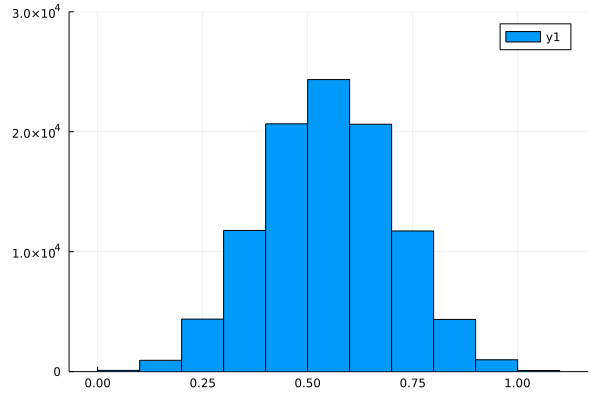

In [219]:
histogram(VR, bins=10, ylims=(0,30000))

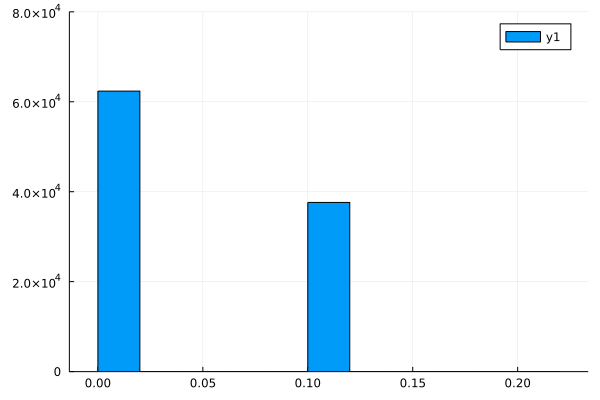

In [223]:
histogram(VM, bins=10, ylims=(0,80000))

In [ ]:
function hoeffding(ep, N)
    return 2.0*exp(-2.0*N*(ep^2))
end

epsilon = collect(0:0.005:0.5)
bounds = [hoeffding(ep,10) for ep in epsilon]
vd_1 = [abs(v-0.5) for v in V1]
vd_rand = [abs(v-0.5) for v in VR]
vd_min = [abs(v-0.5) for v in VM]